In [3]:
%matplotlib inline


from flask_sqlalchemy import SQLAlchemy
from flask import Flask, request, flash, url_for, redirect, render_template
from PIL import Image
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib.image import imread, imsave
import cv2
from skimage.transform import resize

In [4]:
# depth_data = np.genfromtxt('./img.csv', delimiter=',', skip_header=1, skip_footer=1, usecols=range(1,201))
depth_data = np.genfromtxt('./img.csv', delimiter=',', skip_header = 1,  skip_footer=1, usecols=range(0,201))
print(depth_data.shape)
print(depth_data[:, 1:])
raw_data = depth_data[:, 1:]


(5460, 201)
[[224. 224. 224. ... 220. 217. 217.]
 [224. 224. 224. ... 221. 219. 219.]
 [224. 224. 224. ... 223. 223. 223.]
 ...
 [184. 188. 198. ... 167. 173. 174.]
 [147. 161. 195. ... 177. 179. 180.]
 [131. 149. 194. ... 182. 182. 182.]]


In [5]:
imsave('./original_depth.png', raw_data, cmap='gray')

In [6]:
plt.figure(dpi=200)

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

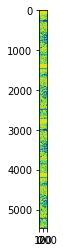

In [7]:
plt.imshow(raw_data)

In [8]:
resized_data = resize(raw_data, (raw_data.shape[0], 150))

In [9]:
imsave('resized_data.png', resized_data)

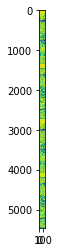

In [10]:
plt.imshow(resized_data)

In [11]:
resized_data.shape

(5460, 150)

In [12]:
type(resized_data)

numpy.ndarray

In [13]:
out_data = np.concatenate((depth_data[:, 0:1], resized_data), axis=1)

In [14]:
out_data.shape

(5460, 151)

In [38]:
columns = ['depth']
for i in range(150):
    columns.append('col' + str(i))
len(columns)

151

In [39]:
depth_df = pd.DataFrame(out_data, columns=columns)

In [40]:
my_list = depth_df.columns.values.tolist()
my_list[0:5]

['depth', 'col0', 'col1', 'col2', 'col3']

(151,)


In [47]:
src = cv2.imread(r'./original_depth.png', 0)

# set a new width in pixels
new_width = 150

# dsize
dsize = (new_width, src.shape[0])

# resize image
output = cv2.resize(src, dsize, interpolation = cv2.INTER_CUBIC)

cv2.imwrite(r'./resized_depth.png', output) 

True

In [48]:
src[0][0]

200